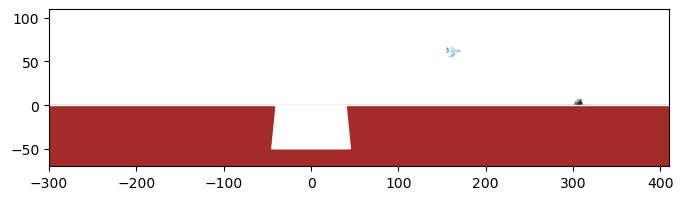

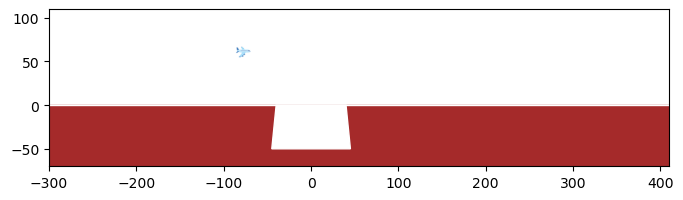

In [2]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Constantes
g = 9.8  # Aceleración de la gravedad en m/s^2

# Función para calcular la trayectoria de la bomba
def calcular_trayectoria(V, Ha, x_suelta):
    t_impacto = np.sqrt(2 * Ha / g)  # Tiempo de impacto aproximado
    t = np.linspace(0, t_impacto, num=500)  # Intervalo de tiempo
    x_bomba = x_suelta + V * t  # Posición x de la bomba
    y_bomba = Ha - (0.5 * g * t**2)  # Posición y de la bomba descendiendo
    return x_bomba, y_bomba, t

# Ventana principal del simulador
def abrir_simulador():
    bienvenida.destroy()  # Cierra la ventana de bienvenida

    def iniciar_simulacion():
        try:
            # Obtener valores
            V = float(entry_V.get())
            Ha = float(entry_Ha.get())
            ancho_superior = float(entry_ancho_superior.get())
            profundidad = float(entry_profundidad.get())
            ancho_base = float(entry_ancho_base.get())

            if V <= 0 or Ha <= 0 or ancho_superior <= 0 or profundidad <= 0 or ancho_base <= 0:
                raise ValueError("Todos los valores deben ser positivos.")
        except ValueError as e:
            tk.messagebox.showerror("Error de entrada", f"Por favor, ingresa valores válidos.\n{e}")
            return

        # Coordenada de suelta de la bomba (punto máximo izquierdo del cañón)
        x_suelta = -ancho_superior / 2

        # Calcular la trayectoria de la bomba
        x_bomba, y_bomba, t = calcular_trayectoria(V, Ha, x_suelta)

        # Limpiar cualquier gráfico anterior
        for widget in frame_canvas.winfo_children():
            widget.destroy()

        # Configuración de gráficos
        fig, ax = plt.subplots(figsize=(10, 6))

        # Dibujar el fondo marrón (ajustado a la profundidad)
        ax.fill_between([-1000, 1000], -profundidad - 20, 0, color="brown")

        # Coordenadas del cañón
        x1, y1 = -ancho_superior / 2, 0
        x2, y2 = ancho_superior / 2, 0
        x3, y3 = ancho_base / 2, -profundidad
        x4, y4 = -ancho_base / 2, -profundidad
        x_coords = [x1, x4, x3, x2, x1]
        y_coords = [y1, y4, y3, y2, y1]

        # Dibujar el cañón
        ax.fill(x_coords, y_coords, color="white")

        # Configuración del entorno
        ax.set_xlim(-300, max(x_bomba) + 100)
        ax.set_ylim(-profundidad - 20, Ha + 50)
        ax.axhline(0, color="white", linewidth=1)

        # Cargar imágenes del avión y la bomba
        try:
            avion_img = Image.open('avion1.png').resize((60, 60))
            bomba_img = Image.open('bomba.png').resize((20, 20))
        except FileNotFoundError:
            tk.messagebox.showerror("Error", "Asegúrate de que las imágenes 'avion1.png' y 'bomba.png' están en el directorio.")
            return

        # Añadir imágenes al gráfico
        avion = ax.imshow(avion_img, extent=[-250 - 10, -250 + 10, Ha - 10, Ha + 10], animated=True)
        bomba = ax.imshow(bomba_img, extent=[-250 - 10, -250 + 10, Ha - 10, Ha + 10], animated=True, visible=False)

        # Incrustar el gráfico en Tkinter
        canvas = FigureCanvasTkAgg(fig, master=frame_canvas)
        canvas.get_tk_widget().pack()

        # Animación
        def actualizar_animacion(frame):
            # Mover el avión a una velocidad constante
            pos_x_avion = -200 + V * frame / 50
            avion.set_extent([pos_x_avion - 10, pos_x_avion + 10, Ha - 10, Ha + 10])

            # Calcular el tiempo en el que el avión alcanza el punto de liberación
            if pos_x_avion >= x_suelta:
                tiempo_bomba = (frame * 0.02)  # Ajuste de tiempo para la bomba
                index_bomba = int(tiempo_bomba * len(t) / (np.max(t) - np.min(t)))

                # Asegurarse de que el índice no se salga del rango
                if index_bomba < len(x_bomba):
                    pos_x_bomba = x_bomba[index_bomba]
                    pos_y_bomba = y_bomba[index_bomba]
                    bomba.set_extent([pos_x_bomba - 10, pos_x_bomba + 10, pos_y_bomba - 10, pos_y_bomba + 10])
                    bomba.set_visible(True)

            fig.canvas.draw_idle()
            root.after(20, actualizar_animacion, frame + 1)

        # Iniciar la animación
        actualizar_animacion(0)

    # Crear ventana principal
    root = tk.Tk()
    root.title("Simulación del Avión y la Bomba")
    root.geometry("800x600")

    # Crear la interfaz
    frame_inputs = tk.Frame(root, pady=10)
    frame_inputs.pack()

    tk.Label(frame_inputs, text="Velocidad del Avión (V):").grid(row=0, column=0, pady=5)
    entry_V = tk.Entry(frame_inputs)
    entry_V.grid(row=0, column=1, pady=5)

    tk.Label(frame_inputs, text="Altura del Avión (Ha):").grid(row=1, column=0, pady=5)
    entry_Ha = tk.Entry(frame_inputs)
    entry_Ha.grid(row=1, column=1, pady=5)

    tk.Label(frame_inputs, text="Ancho Superior del Cañón:").grid(row=2, column=0, pady=5)
    entry_ancho_superior = tk.Entry(frame_inputs)
    entry_ancho_superior.grid(row=2, column=1, pady=5)

    tk.Label(frame_inputs, text="Profundidad del Cañón:").grid(row=3, column=0, pady=5)
    entry_profundidad = tk.Entry(frame_inputs)
    entry_profundidad.grid(row=3, column=1, pady=5)

    tk.Label(frame_inputs, text="Ancho de la Base del Cañón:").grid(row=4, column=0, pady=5)
    entry_ancho_base = tk.Entry(frame_inputs)
    entry_ancho_base.grid(row=4, column=1, pady=5)

    tk.Button(root, text="Iniciar Simulación", command=iniciar_simulacion, bg="blue", fg="white").pack(pady=10)

    frame_canvas = tk.Frame(root, bg="lightgray")
    frame_canvas.pack(expand=True, fill="both")

    root.mainloop()

# Crear ventana de bienvenida
bienvenida = tk.Tk()
bienvenida.title("Bienvenida")
bienvenida.geometry("600x400")

# Configurar contenido de bienvenida
tk.Label(bienvenida, text="Simulación del Avión y la Bomba", font=("Arial", 20, "bold")).pack(pady=20)
tk.Label(bienvenida, text="Integrantes del Proyecto:", font=("Arial", 14)).pack()
tk.Label(bienvenida, text="• Nombre 1\n• Nombre 2\n• Nombre 3", font=("Arial", 12)).pack(pady=10)
tk.Label(
    bienvenida,
    text="Este proyecto simula la trayectoria de una bomba lanzada desde un avión.\n"
         "Podrás observar cómo la bomba impacta el suelo según los parámetros ingresados.",
    font=("Arial", 12),
    wraplength=500,
    justify="center",
).pack(pady=20)

# Botón para iniciar el simulador
tk.Button(bienvenida, text="Iniciar", command=abrir_simulador, bg="green", fg="white", font=("Arial", 14)).pack(pady=20)

bienvenida.mainloop()